#                                    METRO Project
formatting the metro_complet.txt file for creating the algorithm

In [1]:
import pandas as pd
import numpy as np
import random

#open the file
df = pd.read_csv('D:/Matheuristics Optimisation/Metro/metro_complet.txt', sep = '|', encoding = "latin-1",header= 0)

#selection of the variables gates and stations of the column vertice
vertice=df[:376]
vertice.columns = ['Vertice']
vertice = pd.DataFrame(vertice.Vertice.str.split(' ',1).tolist(), 
            columns = ['p_station','stations']) 

#put the values of the vertice columns in the correct format
vertice.p_station=pd.to_numeric(vertice.p_station, errors='coerce')

#selection of the input gate variables, output gate and travel time of the Edges data frame
edges=df[376:1312]
edges = edges.drop([376])
edges.reset_index(drop=True, inplace=True)
edges.columns = ['Edges']

#separate each information from the edge column
edges = pd.DataFrame(edges.Edges.str.split(' ',2).tolist(), 
            columns = ['pe','ps','tps_par'])

#put the values of the columns in numeric
edges.pe=pd.to_numeric(edges.pe, errors='coerce')
edges.ps=pd.to_numeric(edges.ps, errors='coerce')
edges.tps_par=pd.to_numeric(edges.tps_par, errors='coerce')

print(vertice.head())
print(edges.head())

   p_station         stations
0          0         Abbesses
1          1  Alexandre Dumas
2          2     Alma Marceau
3          3           Alésia
4          4   Anatole France
   pe   ps  tps_par
0   0  238     41.0
1   0  159     46.0
2   1   12     36.0
3   1  235     44.0
4   2  110     69.0


# creation of functions for the metro algorithm

In [2]:
#selection of the entrance door by random
def select_porte():
    l = [i for i in range(len(vertice.p_station))]
#return the entrance door by random
    return random.choice(l) 


In [3]:
#selection of the exit door by the shortest time
def select_by_time(best_g):
    best_time=[]
    time_gates=[]
    out_gates=[]
    out_time_gate=[]
    best_gate=[]
    nst=[]
    
    for i in range (0,len(edges.pe)):
        if edges.pe[i] == best_g:
            out_gates.append(edges.ps[i])
            time_gates.append(edges.tps_par[i])
            out_time_gate.append([edges.ps[i]]+[edges.tps_par[i]])
            
#find the shortest time of the exit doors and display the corresponding door           
    best_time.append(min(time_gates))
    
    for j in range(len(out_time_gate)):
        nst=out_time_gate[j]
        if nst[1]==best_time:
            best_gate.append(nst[0])
            
#return the number of the door with the best time 
    return best_gate, best_time

In [4]:
#selection of the door that was least visited
#compar the station already visited by the list of total station visited 
def station_visited(sta_alreadyvisited,total_station):
    station_view=[]
    best_gate=[]
    
    for i in range((len(sta_alreadyvisited))):
        station_view.append(total_station.count(sta_alreadyvisited[i]))
        
    for j in range(len(station_view)):
        if station_view[j]==min(station_view):
            best_gate.append(sta_alreadyvisited[j])
            
#return the number of the least visited door                  
    return best_gate

In [5]:
#selection of the travel time corresponding to the door best_gate
def best_time_select(best_gate,out_time_gate):
    best_time=[]
    nst=[]
    
    for i in range (0,len(out_time_gate)):
        nst.append(out_time_gate[i])
        if nst[i][0]==best_gate[0]:
            best_time.append(nst[i][1])

#return the best time of the door best_gate
    return best_time

In [6]:
#selection of the door:
#by the best time of the exit door or by its frequency of appearance
def selection_station_time(best_g,total_station):
    sta_notvisited=[]
    sta_alreadyvisited=[]
    best_time=[]
    time_gates=[]
    out_gates=[]
    out_time_gate=[]
    best_gate=[]
    nst=[]
    
    for i in range (0,len(edges.pe)):
        if edges.pe[i] == best_g:
            out_gates.append(edges.ps[i])
            time_gates.append(edges.tps_par[i])
            out_time_gate.append([edges.ps[i]]+[edges.tps_par[i]])
            
    best_time.append(min(time_gates)) 
    for j in range(len(out_time_gate)):
        nst=out_time_gate[j]
        if nst[1]==best_time:
            best_gate.append(nst[0])
#comparison of the doors if they have already been seen            
    for i in range (0,len(out_gates)):
        if out_gates[i] not in total_station:
            sta_notvisited.append(out_gates[i])
        else:
            sta_alreadyvisited.append(out_gates[i])      
            
#if doors have not been seen, a door is randomly selected          
    if sta_notvisited !=[]:
        best_gate=[random.choice(sta_notvisited)]
        best_time=best_time_select(best_gate,out_time_gate)
        
#if the doors have been visited we choose the least visited door        
    else:
        best_gate=station_visited(sta_alreadyvisited,total_station)
        best_time=best_time_select(best_gate,out_time_gate)

#return the number of the door with the best time 
    return best_gate,best_time   

# RUN 

we run the algorithm with a fixed gateway

In [7]:
#the stopping criteria are the total time of 20h and the number of stations visited 376
best_g=29

#or we can start with a random gate
#best_g=select_porte()

total_station=[]
time_total=0

total_station=total_station+[best_g]
while time_total <72000:
    best_g=selection_station_time(best_g,total_station)
    time_total=time_total+(best_g[1][0])
    total_station=total_station+[best_g[0][0]]
    best_g=best_g[0][0]
    number_unique_station=len(set(total_station))
    number_station=len(total_station)
    if number_unique_station==376:
            break
#return(total_station)
print("number of total station visited is:",number_station)
print("The number of unique station is:",number_unique_station)
print("The total time for the parcours is:",time_total)
print("########################################################")
print(total_station)

number of total station visited is: 1219
The number of unique station is: 376
The total time for the parcours is: 65349.0
########################################################
[29, 374, 134, 270, 226, 160, 143, 144, 31, 41, 34, 248, 247, 146, 283, 20, 129, 311, 313, 140, 122, 125, 340, 341, 339, 151, 13, 14, 124, 121, 123, 63, 169, 170, 144, 142, 75, 21, 86, 211, 284, 285, 115, 263, 114, 263, 114, 263, 115, 116, 233, 320, 279, 278, 357, 247, 146, 283, 20, 129, 311, 7, 290, 136, 68, 69, 120, 119, 295, 296, 105, 163, 18, 61, 335, 107, 314, 312, 350, 8, 309, 310, 342, 65, 342, 343, 32, 303, 304, 33, 344, 315, 220, 316, 369, 58, 307, 215, 42, 190, 269, 301, 88, 181, 88, 181, 88, 301, 269, 190, 42, 215, 213, 214, 236, 19, 93, 97, 23, 287, 62, 216, 243, 244, 164, 49, 241, 149, 345, 254, 71, 255, 228, 227, 173, 67, 70, 165, 375, 165, 70, 73, 330, 222, 323, 334, 333, 208, 207, 100, 321, 359, 137, 51, 50, 77, 356, 227, 173, 67, 135, 331, 16, 17, 40, 297, 219, 297, 40, 17, 288, 118, 117, 148,

In [19]:
num_stations=[]
nom_stations=[]
tps_parcourt=0
for i in range(0,len(vertice.p_station)):
    for j in range(0,len(total_station)):
        if vertice.p_station[i]==total_station[j]:
            nom_stations.append(vertice.stations[i])
        if vertice.p_station[i]==total_station[j]:
            tps_parcourt=tps_parcourt+edges.tps_par[i]
                     
            
print("the total number of metro stations :", len(set(vertice.stations)))
print("the number of single stations for the course is:",len(set(nom_stations))) 
print("the time of travel in hours:", tps_parcourt/3600)

the total number of metro stations : 296
the number of single stations for the course is: 296
the time of travel in hours: 16.264444444444443


the algorithm goes through the 296 stations of the Paris metro in 16 hours and 27 seconds.
I worked with lists the runtime of the algorithm is quite slow, it would be faster if I would have made a matrix

# Representation of Paris Map train station

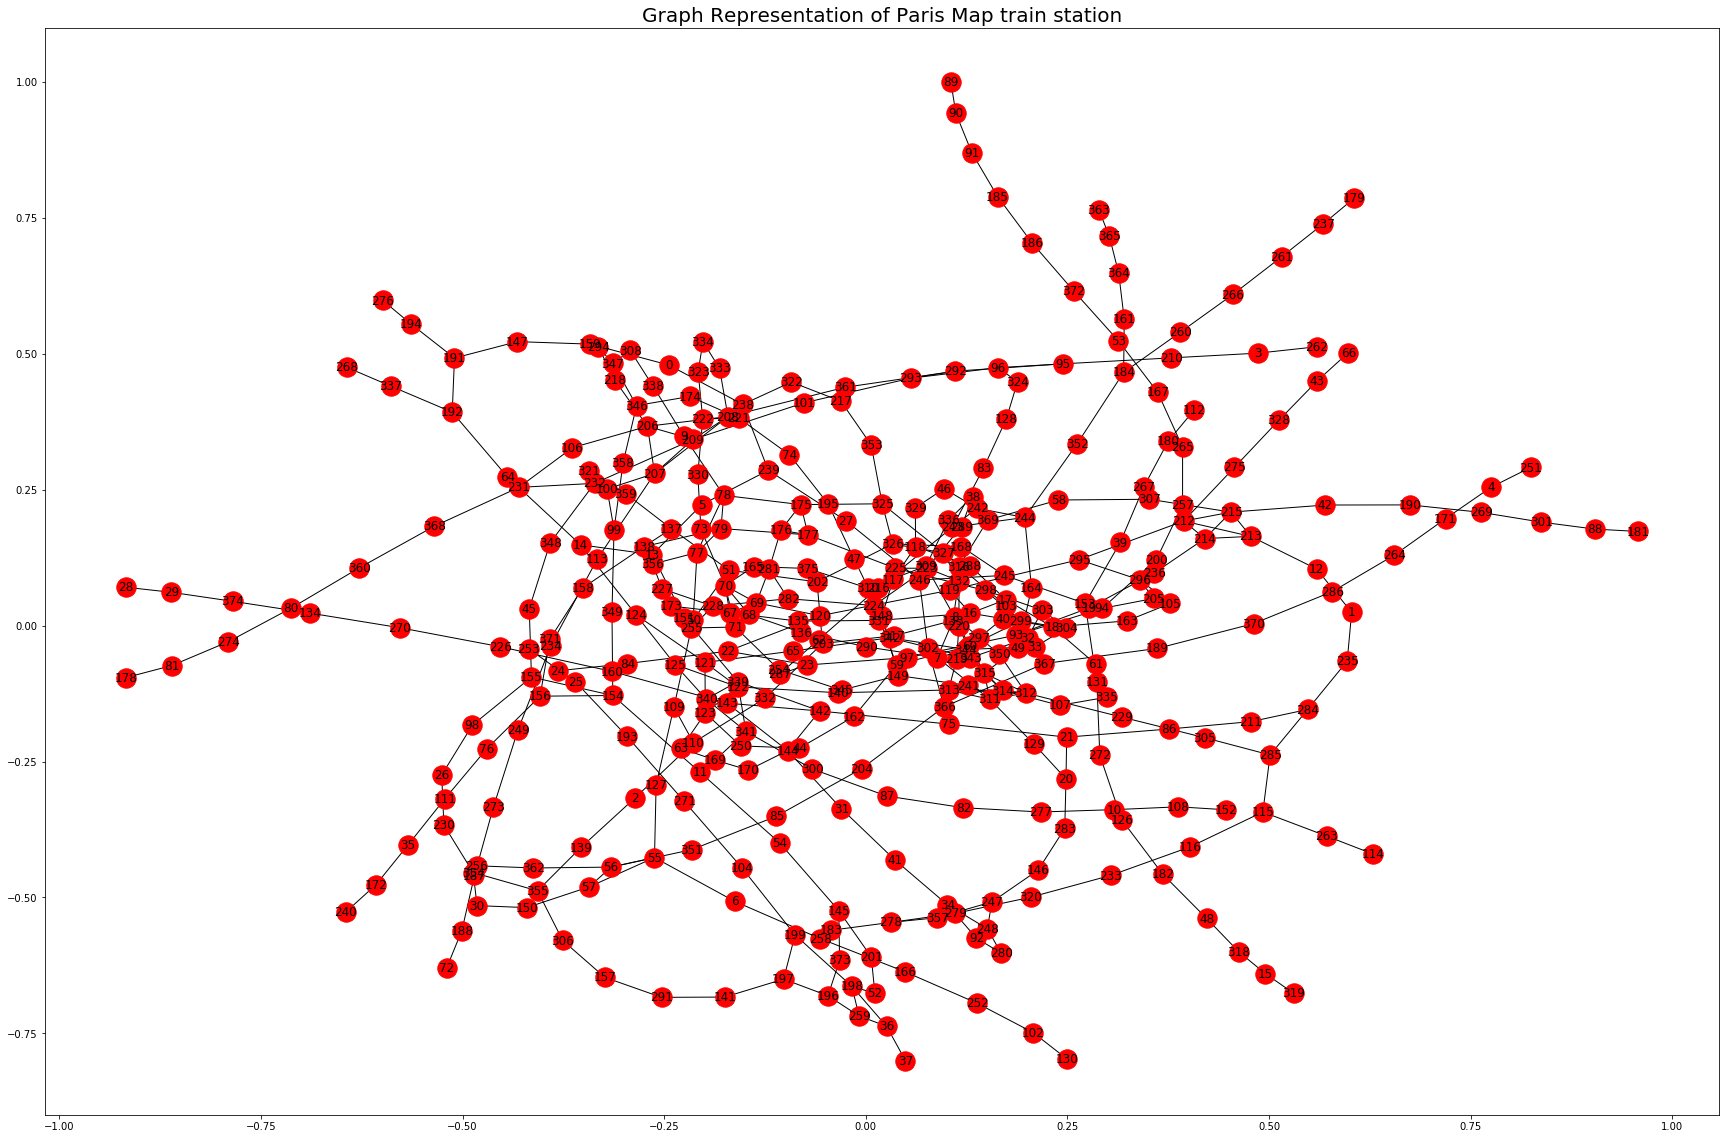

In [27]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
nodelist=pd.concat([vertice,edges],axis = 1,sort=False)
df1=nx.from_pandas_edgelist(nodelist, source='pe', target='ps', edge_attr=True)

% matplotlib inline                
plt.figure(figsize=(30,20))
nx.draw_networkx(df1, node_size=376, node_color='red',with_labels=True)
plt.title('Graph Representation of Paris Map train station', size=20)
plt.show()



testing of pygmo frameworks to improve travel time - not finish

In [24]:
class metro_function:
    def fitness(self, time_total):
        return [min(time_total)]

    def get_bounds(self):
        return ([0,0],[7200,7200])
    
    def circuit(self,best_g,time_total):
        best_g=142#select_porte()
        total_station=[]
        time_total=0

        total_station=total_station+[best_g]
        #selection deuxieme station par meilleur temps
        while time_total <7200:
            best_g=selection_station_time(best_g,total_station)
            time_total=time_total+(best_g[1][0])
            total_station=total_station+[best_g[0][0]]
            best_g=best_g[0][0]
            number_unique_station=len(set(total_station))
            number_station=len(total_station)
            if number_unique_station==376:
                  break
        return(total_station)
        

In [25]:
import pygmo as pg
prob = pg.problem(metro_function())
print(prob)

Problem name: <class '__main__.metro_function'>
	Global dimension:			2
	Integer dimension:			0
	Fitness dimension:			1
	Number of objectives:			1
	Equality constraints dimension:		0
	Inequality constraints dimension:	0
	Lower bounds: [0, 0]
	Upper bounds: [7200, 7200]

	Has gradient: false
	User implemented gradient sparsity: false
	Has hessians: false
	User implemented hessians sparsity: false

	Fitness evaluations: 0

	Thread safety: none

